Import libraries to use

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 200

Get Data

In [3]:
film_df = pd.read_csv('/Users/xumingkai/Desktop/assignment3a/actors_metadata.csv', delimiter=",", encoding='utf-8')

Use `.sample()` to look at a random *n* number of rows in a DataFrame

In [9]:
film_df.sample(10)

,X,X.1,CHARACTER_ID,SCRIPT_ID,CHARACTER_NAME,ACTOR_NAME,PARTIAL_MATCH,GENDER,MISGENDER,CHARACTER_RACE,ACTOR_RACE,PART_WHITE,AGE,EXTRACTED_WORDS,POLYGRAPH_.WORDS,IMDB_ACTOR_HOMEPAGE,GOOGLE_IMAGE_SEARCH
852,935,571,13813,4561,pete dayton,Balthazar Getty,n,m,NaN,w,NaN,NaN,22.0,474,826,http://www.imdb.com/name/nm0001267/?ref_=ttfc_...,https://www.google.com/search?q=Balthazar+Gett...
2496,2789,4416,4893,1872,matty walker,Kathleen Turner,n,f,NaN,w,NaN,NaN,27.0,2412,7204,http://www.imdb.com/name/nm0000678/?ref_=ttfc_...,https://www.google.com/search?q=Kathleen+Turne...
647,707,93,7007,2412,ricky roma,Al Pacino,n,m,NaN,w,NaN,NaN,52.0,2599,5844,http://www.imdb.com/name/nm0000199/?ref_=ttfc_...,https://www.google.com/search?q=Al+Pacino+acto...
3392,3773,6568,819,830,bastaldi,Richard Bohringer,n,m,NaN,w,NaN,NaN,61.0,265,362,http://www.imdb.com/name/nm0092184/?ref_=ttfc_...,https://www.google.com/search?q=Richard+Bohrin...
3357,3733,6458,5634,2059,caius martius c,Ralph Fiennes,y,m,NaN,w,NaN,NaN,49.0,249,3156,http://www.imdb.com/name/nm0000146/?ref_=ttfc_...,https://www.google.com/search?q=Ralph+Fiennes+...
3170,3529,6047,11057,3546,porthos,Oliver Platt,n,m,NaN,w,NaN,NaN,33.0,690,1048,http://www.imdb.com/name/nm0001624/?ref_=ttfc_...,https://www.google.com/search?q=Oliver+Platt+a...
3911,4339,7817,2131,1148,kay,Tommy Lee Jones,n,m,NaN,w,NaN,NaN,51.0,1836,2471,http://www.imdb.com/name/nm0000169/?ref_=ttfc_...,https://www.google.com/search?q=Tommy+Lee+Jone...
3369,3746,6496,1137,906,mr. hand,Ray Walston,n,m,NaN,w,NaN,NaN,68.0,596,817,http://www.imdb.com/name/nm0001827/?ref_=ttfc_...,https://www.google.com/search?q=Ray+Walston+ac...
2532,2829,4518,12845,4228,victor frankens,Kenneth Branagh,y,m,NaN,w,NaN,NaN,34.0,1309,2111,http://www.imdb.com/name/nm0000110/?ref_=ttfc_...,https://www.google.com/search?q=Kenneth+Branag...
174,183,2376,8610,2814,sidra o'neal,Erika Ringor,n,f,NaN,b,b,f,NaN,336,477,http://www.imdb.com/name/nm0727640/?ref_=ttfc_...,https://www.google.com/search?q=Erika+Ringor+a...


Select the columns I need

In [100]:
selected_columns = film_df[['SCRIPT_ID','ACTOR_NAME', 'GENDER', 'CHARACTER_RACE', 'EXTRACTED_WORDS']]

Calculate Total Words and Average Words by Character Race:

In [78]:
total_words_by_race = selected_columns.groupby('CHARACTER_RACE')['EXTRACTED_WORDS'].sum()
average_words_by_race = selected_columns.groupby('CHARACTER_RACE')['EXTRACTED_WORDS'].mean()

Calculate Word Ratios and Create a Bar Plot

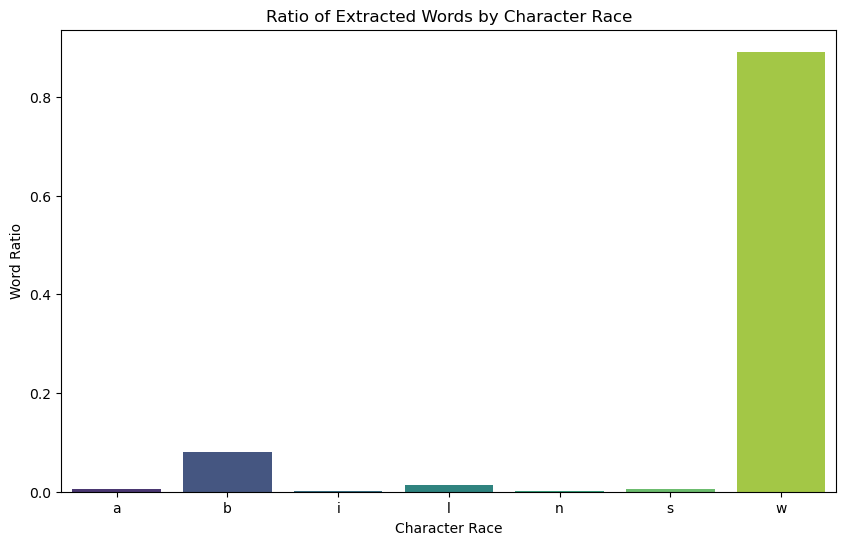

In [81]:
word_ratio_by_race = total_words_by_race / total_words_by_race.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=word_ratio_by_race.index, y=word_ratio_by_race.values, palette='viridis')
plt.title('Ratio of Extracted Words by Character Race')
plt.xlabel('Character Race')
plt.ylabel('Word Ratio')
plt.show()

Select data except white characters

In [82]:
selected_columns_no_white = selected_columns[selected_columns['CHARACTER_RACE'] != 'w']

Calculate the total number of words and word ratio for each non-white character race

In [87]:
total_words_by_race = selected_columns_no_white.groupby('CHARACTER_RACE')['EXTRACTED_WORDS'].sum()
word_ratio_by_race = total_words_by_race / total_words_by_race.sum()

Make a barpolt

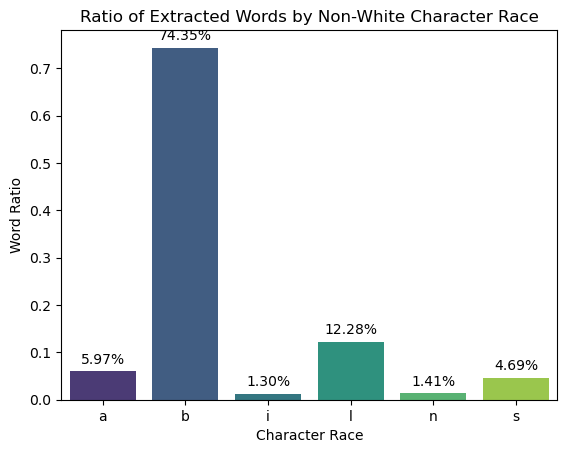

In [88]:
barplot = sns.barplot(x=word_ratio_by_race.index, y=word_ratio_by_race.values, palette='viridis')

for i, value in enumerate(word_ratio_by_race.values):
    barplot.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom')

plt.title('Ratio of Extracted Words by Non-White Character Race')
plt.xlabel('Character Race')
plt.ylabel('Word Ratio')
plt.show()

Add a new dataset

In [97]:
scripts_metadata = pd.read_csv('/Users/xumingkai/Desktop/assignment3a/scripts_metadata.csv', delimiter=",", encoding='utf-8')

Merge the two dataset throught the 'SCRIPT_ID'

In [104]:
merged_df = pd.merge(selected_columns, scripts_metadata, left_on='SCRIPT_ID',right_on='SCRIPT_ID' )

Filter the Data where CHARACTER_RACE is 'a' (Asian) and 'b'(Black)

In [105]:
asian_df = merged_df[merged_df['CHARACTER_RACE'] == 'a']
black_df = merged_df[merged_df['CHARACTER_RACE'] == 'b']

Calculate the total word counts and for Asian characters word count for each year

In [106]:
word_counts_by_year = merged_df.groupby('YEAR')['EXTRACTED_WORDS'].sum()
asian_word_counts_by_year = asian_df.groupby('YEAR')['EXTRACTED_WORDS'].sum()
asian_word_ratio_by_year = asian_word_counts_by_year / word_counts_by_year

Plot the Asian character word ratio over time

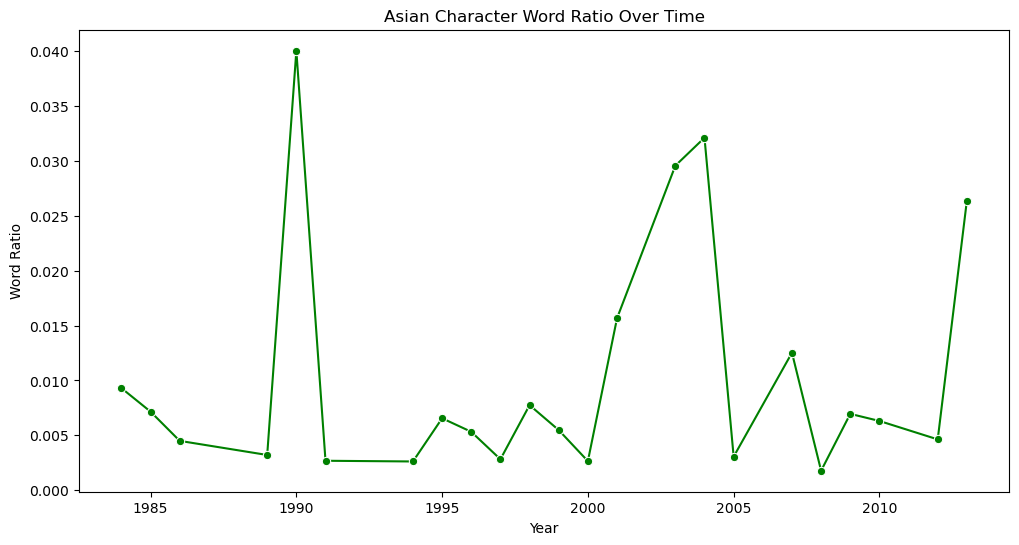

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=asian_word_ratio_by_year.index, y=asian_word_ratio_by_year.values, marker='o', color='green')
plt.title('Asian Character Word Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Word Ratio')
plt.show()

Same as the black characters

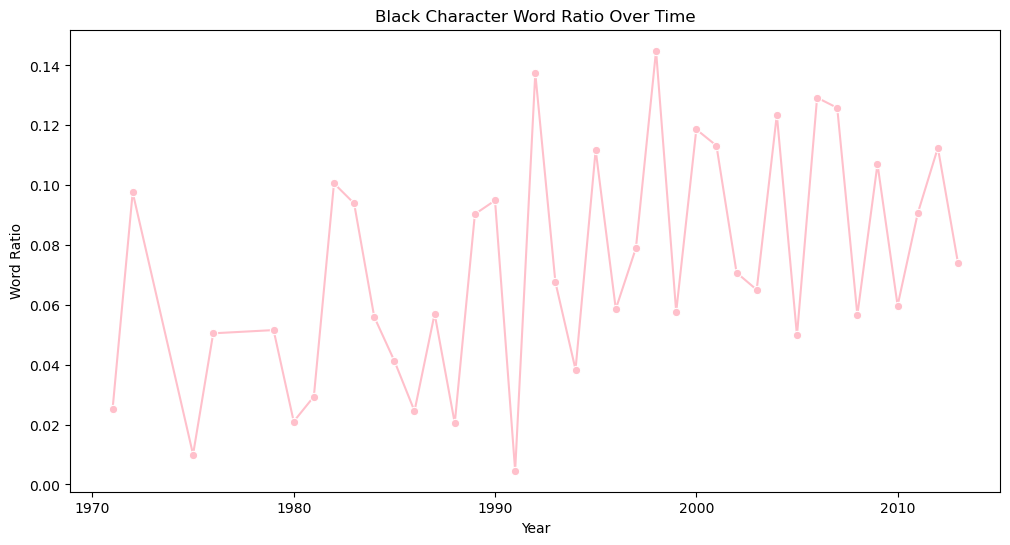

In [57]:
word_counts_by_year = merged_df.groupby('YEAR')['EXTRACTED_WORDS'].sum()
black_df_counts_by_year = black_df.groupby('YEAR')['EXTRACTED_WORDS'].sum()

black_word_ratio_by_year = black_df_counts_by_year / word_counts_by_year

plt.figure(figsize=(12, 6))
sns.lineplot(x=black_word_ratio_by_year.index, y=black_word_ratio_by_year.values, marker='o', color='pink')
plt.title('Black Character Word Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Word Ratio')
plt.show()